### Google Colaboration
- Halak Desai
- Randy Miskuski
- March 26, 2021

The problem: <br>
**"How might we increase access to, or accessibility of, health care services through the use of education & digital solution?"**

Process:
<br>
We will first look through our data and see what our data can and cannot support. Our supplied google drive contains 7 csv files with some useful information, and some non-useful information. Based on the business problem above the Data Team has deemed csv file 1. "noshow_appt.csv" to be the most applicable to our business probelm. 
<br>
<br> 
We have data on patients in Brazil who had missed their appointment. We have several patients that have either Alchololism, Diabeties, Scholarships, Hypertension, and a handicap. We want to know why these patietns are missing their appointments, and if there is a realtionship between having a disability and missing an appointment. 
<br><br>
With some quick EDA, we had concluded that patients with diabetes had missed their appointments the most out of any other types of category within our data.  

Public healthcare is provided to all Brazilian permanent residents and foreigners in Brazilian territory through the National Healthcare System, known as the Unified Health System (Portuguese: Sistema Único de Saúde, SUS). ... The SUS is universal and free for everyone.

Our scope of focus will be on patients that are diagnosed with diabetes. We want to provide an application that a diabetic patient will use that will not only educate them on their condition, but will also offer support with making a given doctors appointment. 

In [1]:
## import packages that we will use throughout the notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob as glob
from scipy import stats
import statsmodels.api as sm

In [2]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

Assumptions

* The same characteristcs exists in patients in Brazil, as they do in the United States
* The healthcare system in Brazil is on a free system, so they would have access to good healthcare as they would in countries like canada or the United States
* We are assuming that each PatientID is Unique to the Patient (a single patient cannot have more than one ID)
* We are assuking that the inputs are true and correct
* We are assuming that Anyone under the age of 16 and over the age of 70 requires external assistance with getting to an appointment. (includes: Transportation/ guidance)

Now lets look at our class imbalances based on the data we have. We have 

In [3]:
data = pd.read_csv('noshow_appt.csv')

### We are going to find number of patients with certain conditions

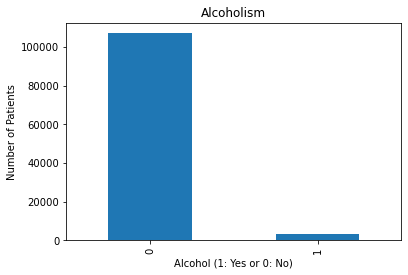

In [4]:
plt.figure()
data['Alcoholism'].value_counts().sort_index().plot.bar()
plt.ylabel('Number of Patients')
plt.xlabel('Alcohol (1: Yes or 0: No)')
plt.title('Alcoholism')
plt.show()

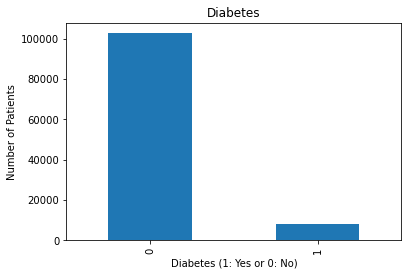

In [5]:
plt.figure()
data['Diabetes'].value_counts().sort_index().plot.bar()
plt.ylabel('Number of Patients')
plt.xlabel('Diabetes (1: Yes or 0: No)')
plt.title('Diabetes')
plt.show()

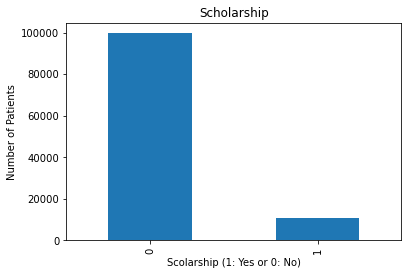

In [6]:
plt.figure()
data['Scholarship'].value_counts().sort_index().plot.bar()
plt.ylabel('Number of Patients')
plt.xlabel('Scolarship (1: Yes or 0: No)')
plt.title('Scholarship')
plt.show()

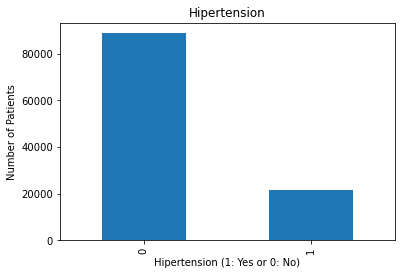

In [7]:
plt.figure()
data['Hipertension'].value_counts().sort_index().plot.bar()
plt.ylabel('Number of Patients')
plt.xlabel('Hipertension (1: Yes or 0: No)')
plt.title('Hipertension')
plt.show()

We can see that Diabetes and Hypertension are the major conditions we can see in the patients

# Cleaning and EDA

In [8]:
# Lets look at the shape of our data.
data.shape

(110527, 14)

In [9]:
# Check for duplicated rows with a loop
# Do not remove duplicated Patient ID because a Patient could have mutiple visits

my_dataset = [data]

for df in my_dataset:
    duplicated_rows = df.duplicated().sum()
    print(f'There are {duplicated_rows} duplicate rows')

There are 0 duplicate rows


In [10]:
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
print(f'Our dataframe has {data.shape[0]} rows and {data.shape[1]} columns')

Our dataframe has 110527 rows and 14 columns


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
# Lets look for any potential outliers we may have in our data using the Max command

data.groupby(['Age']).max().tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Age,,,,,,,,,,,,,
98,1.294694e+14,5756594,M,2016-06-01T08:28:19Z,2016-06-01T00:00:00Z,SÃO PEDRO,0,1,1,0,0,1,Yes
99,3.661577e+10,5775674,F,2016-06-06T09:46:34Z,2016-06-06T00:00:00Z,SANTO ANTÔNIO,0,1,1,0,0,0,No
100,5.578313e+13,5747809,M,2016-05-30T16:21:56Z,2016-06-03T00:00:00Z,TABUAZEIRO,0,0,0,0,1,1,No
102,9.762948e+14,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,MARIA ORTIZ,0,0,0,0,0,0,No
115,7.482346e+14,5744037,F,2016-05-30T09:44:51Z,2016-06-03T00:00:00Z,SÃO JOSÉ,0,1,0,0,1,1,Yes


In [14]:
# Lets look for any potential outliers we may have in our data using the Max command

data.groupby(['Age']).max().head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Age,,,,,,,,,,,,,
-1,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,ROMÃO,0,0,0,0,0,0,No
0,9.978457e+14,5790135,M,2016-06-08T16:51:09Z,2016-06-08T00:00:00Z,VILA RUBIM,1,0,0,0,1,1,Yes
1,9.999816e+14,5789806,M,2016-06-08T15:49:40Z,2016-06-08T00:00:00Z,VILA RUBIM,1,0,1,0,1,1,Yes
2,9.926833e+14,5789984,M,2016-06-08T16:15:59Z,2016-06-08T00:00:00Z,VILA RUBIM,1,0,1,0,1,1,Yes
3,9.942356e+14,5790022,M,2016-06-08T16:28:44Z,2016-06-08T00:00:00Z,VILA RUBIM,1,0,0,0,0,1,Yes


We have an age of -1 lets drop this as this not helpful to our analysis

In [15]:
# Drop the row that contains the negative age

data.drop(data.loc[data['Age'] < 0].index, inplace=True)

In [16]:
data['No-show'] = np.where(data['No-show'] == 'Yes', 1, 0)

In [17]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  int32  
dtypes: float64(1), int32(1), int64(8), object(4)
memory usage: 12.2+ MB


In [19]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

In [20]:
data.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                         int32
dtype: object

### Let us tackle the datatypes and convert date time objects in the datetime format

In [21]:
data['ScheduledNew'] = data['ScheduledDay'].dt.date
data['ScheduledNewTime'] = data['ScheduledDay'].dt.time

In [22]:
data['AppointmentNew'] = data['AppointmentDay'].dt.date
data['AppointmentNewTime'] = data['AppointmentDay'].dt.time

In [23]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledNew,ScheduledNewTime,AppointmentNew,AppointmentNewTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18:38:08,2016-04-29,00:00:00
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,00:00:00
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,00:00:00
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17:29:31,2016-04-29,00:00:00
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16:07:23,2016-04-29,00:00:00


In [24]:
data.dtypes

PatientId                         float64
AppointmentID                       int64
Gender                             object
ScheduledDay          datetime64[ns, UTC]
AppointmentDay        datetime64[ns, UTC]
Age                                 int64
Neighbourhood                      object
Scholarship                         int64
Hipertension                        int64
Diabetes                            int64
Alcoholism                          int64
Handcap                             int64
SMS_received                        int64
No-show                             int32
ScheduledNew                       object
ScheduledNewTime                   object
AppointmentNew                     object
AppointmentNewTime                 object
dtype: object

### Create a new feature for calculating the wait time between the appointments scheduled and actual appointments and name it as Waiting Time Days

In [25]:
data['WaitingTimeDays'] = data['AppointmentNew'] - data['ScheduledNew']
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledNew,ScheduledNewTime,AppointmentNew,AppointmentNewTime,WaitingTimeDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18:38:08,2016-04-29,00:00:00,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,00:00:00,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,00:00:00,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17:29:31,2016-04-29,00:00:00,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16:07:23,2016-04-29,00:00:00,0 days


In [26]:
data['WaitingTimeDays'] = data['WaitingTimeDays'].astype('str')

In [27]:
data['WaitingTimeDays'].dtypes

dtype('O')

In [28]:
data['WaitingTimeDays'] = data['WaitingTimeDays'].str.split(' ', expand = True)

In [29]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledNew,ScheduledNewTime,AppointmentNew,AppointmentNewTime,WaitingTimeDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18:38:08,2016-04-29,00:00:00,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,00:00:00,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,00:00:00,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17:29:31,2016-04-29,00:00:00,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16:07:23,2016-04-29,00:00:00,0


In [30]:
data['WaitingTimeDays'] = data['WaitingTimeDays'].astype('int')

In [31]:
data.dtypes

PatientId                         float64
AppointmentID                       int64
Gender                             object
ScheduledDay          datetime64[ns, UTC]
AppointmentDay        datetime64[ns, UTC]
Age                                 int64
Neighbourhood                      object
Scholarship                         int64
Hipertension                        int64
Diabetes                            int64
Alcoholism                          int64
Handcap                             int64
SMS_received                        int64
No-show                             int32
ScheduledNew                       object
ScheduledNewTime                   object
AppointmentNew                     object
AppointmentNewTime                 object
WaitingTimeDays                     int32
dtype: object

In [32]:
data['WaitingTimeDays'].head(1)

0    0
Name: WaitingTimeDays, dtype: int32

In [33]:
data['ScheduledNew'] = pd.to_datetime(data['ScheduledNew'])
data['AppointmentNew'] = pd.to_datetime(data['AppointmentNew'])

In [34]:
data.dtypes

PatientId                         float64
AppointmentID                       int64
Gender                             object
ScheduledDay          datetime64[ns, UTC]
AppointmentDay        datetime64[ns, UTC]
Age                                 int64
Neighbourhood                      object
Scholarship                         int64
Hipertension                        int64
Diabetes                            int64
Alcoholism                          int64
Handcap                             int64
SMS_received                        int64
No-show                             int32
ScheduledNew               datetime64[ns]
ScheduledNewTime                   object
AppointmentNew             datetime64[ns]
AppointmentNewTime                 object
WaitingTimeDays                     int32
dtype: object

In [35]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledNew,ScheduledNewTime,AppointmentNew,AppointmentNewTime,WaitingTimeDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,18:38:08,2016-04-29,00:00:00,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,16:08:27,2016-04-29,00:00:00,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,16:19:04,2016-04-29,00:00:00,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,17:29:31,2016-04-29,00:00:00,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,16:07:23,2016-04-29,00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03,09:15:35,2016-06-07,00:00:00,35
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03,07:27:33,2016-06-07,00:00:00,35
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,16:03:52,2016-06-07,00:00:00,41
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,15:09:23,2016-06-07,00:00:00,41


### We are going to extract date, months and the day of the week information 

In [36]:
data['ScheduledMonth'] = data['ScheduledNew'].dt.month
data['ScheduledDate'] = data['ScheduledNew'].dt.day
data['ScheduledYear'] = data['ScheduledNew'].dt.year
data['ScheduledWeekDay'] = data['ScheduledNew'].dt.dayofweek

In [37]:
data['AppointmentMonth'] = data['AppointmentNew'].dt.month
data['AppointmentDate'] = data['AppointmentNew'].dt.day
data['AppointmentYear'] = data['AppointmentNew'].dt.year
data['AppointmentWeekDay'] = data['AppointmentNew'].dt.dayofweek

In [38]:
data.drop(['ScheduledDay','AppointmentDay','AppointmentNewTime','ScheduledNewTime'], axis = 1, inplace = True)

In [39]:
data.dtypes

PatientId                    float64
AppointmentID                  int64
Gender                        object
Age                            int64
Neighbourhood                 object
Scholarship                    int64
Hipertension                   int64
Diabetes                       int64
Alcoholism                     int64
Handcap                        int64
SMS_received                   int64
No-show                        int32
ScheduledNew          datetime64[ns]
AppointmentNew        datetime64[ns]
WaitingTimeDays                int32
ScheduledMonth                 int64
ScheduledDate                  int64
ScheduledYear                  int64
ScheduledWeekDay               int64
AppointmentMonth               int64
AppointmentDate                int64
AppointmentYear                int64
AppointmentWeekDay             int64
dtype: object

In [40]:
data

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,AppointmentNew,WaitingTimeDays,ScheduledMonth,ScheduledDate,ScheduledYear,ScheduledWeekDay,AppointmentMonth,AppointmentDate,AppointmentYear,AppointmentWeekDay
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,56,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,35,5,3,2016,1,6,7,2016,1
110523,3.596266e+12,5650093,F,51,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,35,5,3,2016,1,6,7,2016,1
110524,1.557663e+13,5630692,F,21,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,41,4,27,2016,2,6,7,2016,1
110525,9.213493e+13,5630323,F,38,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,41,4,27,2016,2,6,7,2016,1


### We are going to look at some basic insights

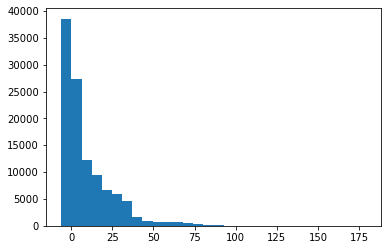

In [41]:
plt.figure()
plt.hist(data['WaitingTimeDays'], bins = 30)
plt.show()

I can see that most of the appointments were same day appointments and very rarerly having appointments scheduled more than 30 days in advance.

In [42]:
D = data.groupby(['Diabetes','No-show']).mean().round(0)['WaitingTimeDays'].reset_index()
D

,Diabetes,No-show,WaitingTimeDays
0,0,0,9.0
1,0,1,16.0
2,1,0,8.0
3,1,1,13.0


<AxesSubplot:xlabel='Diabetes', ylabel='WaitingTimeDays'>

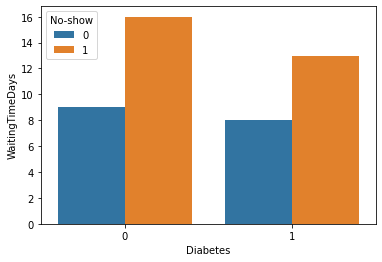

In [43]:
sns.barplot(data=D, y = 'WaitingTimeDays', x = 'Diabetes', hue = 'No-show')

Here we can see that when average wait time are more, people tend to forget their appointments.
Because sometime for regular check-ups for daibetes have pre-booked appointments every 3 months.

When we group our Diabetic patients with our nondiabetic patients. We see that patients that have diabetes tend to not show up to their appointments when time between appointments is on average 7 days. Diabetic patients that show up to their appointment on average will have a waiting time of 2 days.<br>
<br>
When we look at the non-Diabetic Patients, we also found that the median days passed before an appointment is missed is 11 days. Where on average the median of the appointment made is only 2 days.<br>
When we look at this insight we need to consider if there is a relationship between the patients missing scheduled dates because they simply forgot, or can it be related to being diabetic. We do not have data to support this claim, however we should consider diabetic patients are at a higher risk of having other medical implications, so the need to make appointments should be a priority.


In [44]:
data.groupby(['Diabetes']).sum()['No-show']

Diabetes
0    20889
1     1430
Name: No-show, dtype: int32

In [45]:
data.groupby(['Diabetes','Gender']).mean().round(0)['Age']

Diabetes  Gender
0         F         37.0
          M         32.0
1         F         61.0
          M         61.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Diabetes', ylabel='Age'>

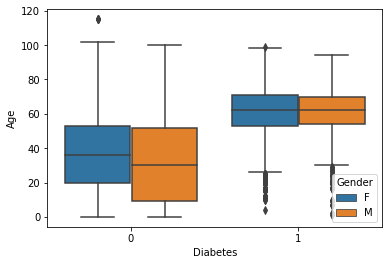

In [46]:
sns.boxplot(data=data, y = 'Age', x = 'Diabetes', hue = 'Gender')

We can see that there is clearly a distinction in ages for people who have Diabetes and Non-Diabetes.
As we can see in the chart average age of patients having diabetes in 61 years and for not having diabetes is 32 to 37 years.
We also found that the patients with Diabetes donot differ by age much.
We can also see there are outliers in the Diabetic range for younger people.

<AxesSubplot:xlabel='Count', ylabel='Diabetes'>

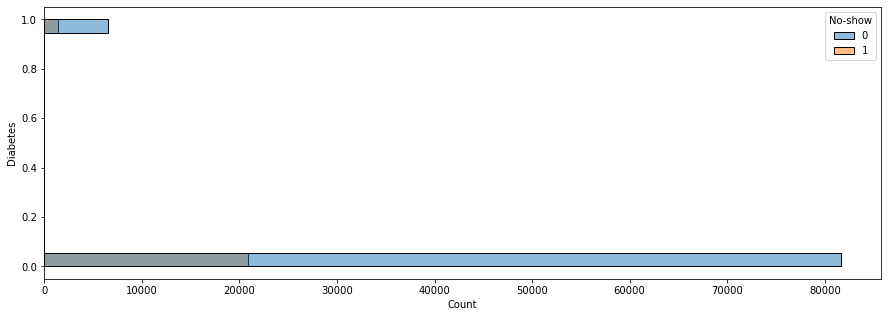

In [47]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=data, y='Diabetes', hue = 'No-show', ax=ax)

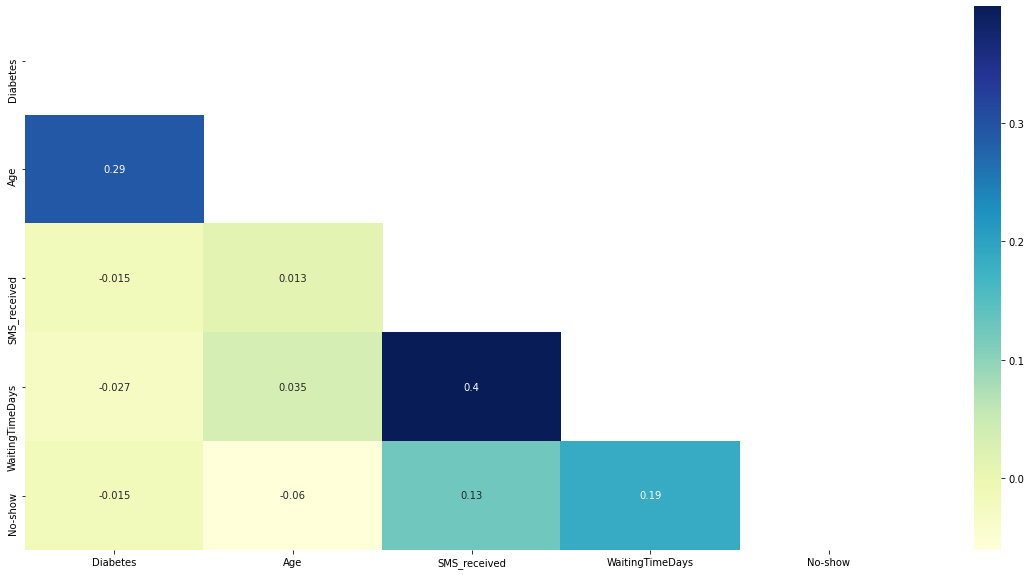

In [48]:
plt.figure(figsize =(20,10))

matrix = np.triu(data[['Diabetes','Age','SMS_received','WaitingTimeDays','No-show']].corr())
sns.heatmap(data[['Diabetes','Age','SMS_received','WaitingTimeDays','No-show']].corr(), annot = True, mask =matrix, cmap ='YlGnBu')
plt.show()

We can see few key features for correlation for No-show

### Preparing for the Modeling

We are going to prep our data so that in future, we can add more data and create a machine learning  model to predict if a patient will show up or not, and we could customize our application more.  

We could also do prediction if a patient could get Diabetes or not, and enhance the application, reach and user experience even better.



### Converting our features into Numerical Data! by using, Map, and OnHotEncoder

In [49]:
# changing gender to numeric. (1 male, 0 female)

data['Gender'] = np.where(data['Gender'] == 'M', 1, 0)
data

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,AppointmentNew,WaitingTimeDays,ScheduledMonth,ScheduledDate,ScheduledYear,ScheduledWeekDay,AppointmentMonth,AppointmentDate,AppointmentYear,AppointmentWeekDay
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,56,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,35,5,3,2016,1,6,7,2016,1
110523,3.596266e+12,5650093,0,51,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,35,5,3,2016,1,6,7,2016,1
110524,1.557663e+13,5630692,0,21,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,41,4,27,2016,2,6,7,2016,1
110525,9.213493e+13,5630323,0,38,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,41,4,27,2016,2,6,7,2016,1


In [50]:
# Lets look for any potential outliers we may have in our data using the Max command

data.groupby(['Age']).max().tail()

,PatientId,AppointmentID,Gender,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,AppointmentNew,WaitingTimeDays,ScheduledMonth,ScheduledDate,ScheduledYear,ScheduledWeekDay,AppointmentMonth,AppointmentDate,AppointmentYear,AppointmentWeekDay
Age,,,,,,,,,,,,,,,,,,,,,
98,1.294694e+14,5756594,1,SÃO PEDRO,0,1,1,0,0,1,...,2016-06-01,90,6,29,2016,4,6,29,2016,4
99,3.661577e+10,5775674,0,SANTO ANTÔNIO,0,1,1,0,0,0,...,2016-06-06,0,6,6,2016,0,6,6,2016,0
100,5.578313e+13,5747809,1,TABUAZEIRO,0,0,0,0,1,1,...,2016-06-03,28,5,30,2016,4,6,31,2016,4
102,9.762948e+14,5751563,0,MARIA ORTIZ,0,0,0,0,0,0,...,2016-06-02,2,5,31,2016,1,6,3,2016,3
115,7.482346e+14,5744037,0,SÃO JOSÉ,0,1,0,0,1,1,...,2016-06-03,38,5,30,2016,4,6,30,2016,4


In [53]:
data.shape

(110526, 23)

In [54]:
data['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

We have 81 Neighborhoods where Jardim Camburi, Maria Ortiz, and Resistencia are the three most popular neighborhoods for appointments.

In [55]:
# looking for any negative values in PAtient ID
data.groupby(['PatientId']).max().head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,AppointmentNew,WaitingTimeDays,ScheduledMonth,ScheduledDate,ScheduledYear,ScheduledWeekDay,AppointmentMonth,AppointmentDate,AppointmentYear,AppointmentWeekDay
PatientId,,,,,,,,,,,,,,,,,,,,,
39217.84439,5751990,0,44,PRAIA DO SUÁ,0,0,0,0,0,0,...,2016-06-03,3,5,31,2016,1,6,3,2016,4
43741.75652,5760144,1,39,MARIA ORTIZ,0,0,1,0,0,0,...,2016-06-01,0,6,1,2016,2,6,1,2016,2
93779.52927,5712759,0,33,CENTRO,0,0,0,0,0,0,...,2016-05-18,0,5,18,2016,2,5,18,2016,2
141724.16655,5637648,1,12,FORTE SÃO JOÃO,0,0,0,0,0,0,...,2016-05-02,3,4,29,2016,4,5,2,2016,0
537615.28476,5637728,0,14,FORTE SÃO JOÃO,0,0,0,0,0,1,...,2016-05-06,7,4,29,2016,4,5,6,2016,4


In [56]:
# looking for any negative values in Appointment ID
data.groupby(['PatientId']).max().head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,AppointmentNew,WaitingTimeDays,ScheduledMonth,ScheduledDate,ScheduledYear,ScheduledWeekDay,AppointmentMonth,AppointmentDate,AppointmentYear,AppointmentWeekDay
PatientId,,,,,,,,,,,,,,,,,,,,,
39217.84439,5751990,0,44,PRAIA DO SUÁ,0,0,0,0,0,0,...,2016-06-03,3,5,31,2016,1,6,3,2016,4
43741.75652,5760144,1,39,MARIA ORTIZ,0,0,1,0,0,0,...,2016-06-01,0,6,1,2016,2,6,1,2016,2
93779.52927,5712759,0,33,CENTRO,0,0,0,0,0,0,...,2016-05-18,0,5,18,2016,2,5,18,2016,2
141724.16655,5637648,1,12,FORTE SÃO JOÃO,0,0,0,0,0,0,...,2016-05-02,3,4,29,2016,4,5,2,2016,0
537615.28476,5637728,0,14,FORTE SÃO JOÃO,0,0,0,0,0,1,...,2016-05-06,7,4,29,2016,4,5,6,2016,4


In [57]:
data

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,AppointmentNew,WaitingTimeDays,ScheduledMonth,ScheduledDate,ScheduledYear,ScheduledWeekDay,AppointmentMonth,AppointmentDate,AppointmentYear,AppointmentWeekDay
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,56,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,35,5,3,2016,1,6,7,2016,1
110523,3.596266e+12,5650093,0,51,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,35,5,3,2016,1,6,7,2016,1
110524,1.557663e+13,5630692,0,21,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,41,4,27,2016,2,6,7,2016,1
110525,9.213493e+13,5630323,0,38,MARIA ORTIZ,0,0,0,0,0,...,2016-06-07,41,4,27,2016,2,6,7,2016,1


# One Hot Encoding

One hot encode our Neighborhoods so we can use the dataframe for Logistic Regression

In [58]:
data.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,AppointmentNew,WaitingTimeDays,ScheduledMonth,ScheduledDate,ScheduledYear,ScheduledWeekDay,AppointmentMonth,AppointmentDate,AppointmentYear,AppointmentWeekDay
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,...,2016-04-29,0,4,29,2016,4,4,29,2016,4


In [59]:
data['Neighbourhood'].head()

0      JARDIM DA PENHA
1      JARDIM DA PENHA
2        MATA DA PRAIA
3    PONTAL DE CAMBURI
4      JARDIM DA PENHA
Name: Neighbourhood, dtype: object

In [60]:
one_hot = pd.get_dummies(data['Neighbourhood'])
one_hot

,AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO,ARIOVALDO FAVALESSA,BARRO VERMELHO,BELA VISTA,BENTO FERREIRA,BOA VISTA,BONFIM,CARATOÍRA,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data_combined_onehot = pd.concat([data, one_hot], axis=1)
data_combined_onehot

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,2.987250e+13,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,56,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,3.596266e+12,5650093,0,51,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,1.557663e+13,5630692,0,21,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,9.213493e+13,5630323,0,38,MARIA ORTIZ,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Drop Neighbourhood code now that it is one-hot encoded
data_combined_onehot.drop(['Neighbourhood'], axis=1, inplace = True)

In [63]:
# checking that the onehot encode worked
data_combined_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Columns: 103 entries, PatientId to VILA RUBIM
dtypes: datetime64[ns](2), float64(1), int32(3), int64(16), uint8(81)
memory usage: 30.7 MB
